# **Oasis InfoByte**

# **Data Science Intership - Task 1**

## **Sanika Patil**

### Iris Flower Classification

The dataset contains the measurements of iris flowers for three different species: setosa, versicolor, and virginica. The goal is to build a machine learning model that can learn from these measurements and accurately classify new iris flowers according to their species.

In [46]:
import pandas as pd

In [47]:
data = pd.read_csv("Iris.csv")

# **Data Exploration**

In [48]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
data.shape

(150, 6)

In [50]:
data.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [51]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [52]:
data.duplicated().sum()

0

In [53]:
data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [54]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [55]:
data.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# **Data Visualization**

In [56]:
import seaborn as sb
import matplotlib.pyplot as plt

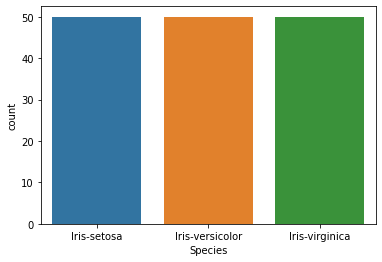

In [57]:
sb.countplot(x = 'Species', data = data, )
plt.show()

In [58]:
n = len(data['Species'] == 'Iris-versicolor')
n1 = len(data['Species'] == 'Iris-virginica')
n2 = len(data['Species'] == 'Iris-setosa')

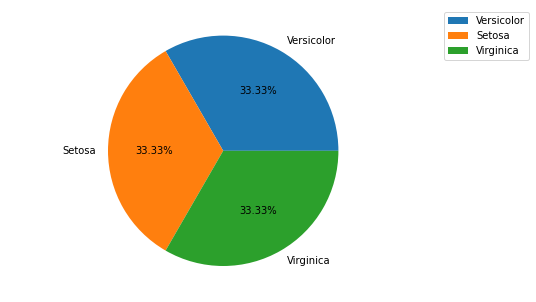

In [59]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [n,n1,n2]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.legend(bbox_to_anchor=(1, 1), loc = 2)
plt.show()

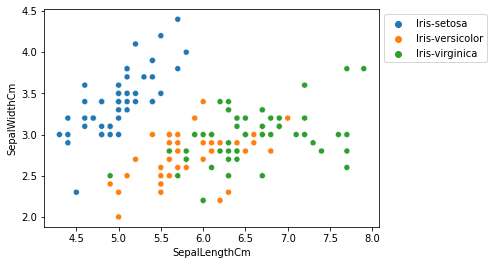

In [60]:
sb.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = data, )
plt.legend(bbox_to_anchor=(1, 1), loc = 2)
plt.show()

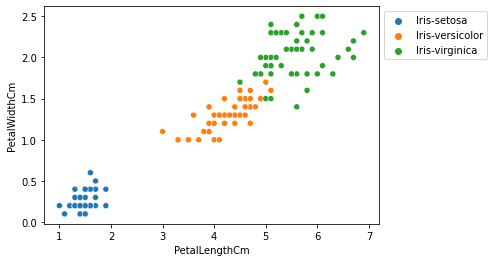

In [61]:
sb.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = data, )
plt.legend(bbox_to_anchor=(1, 1), loc = 2) 
plt.show()

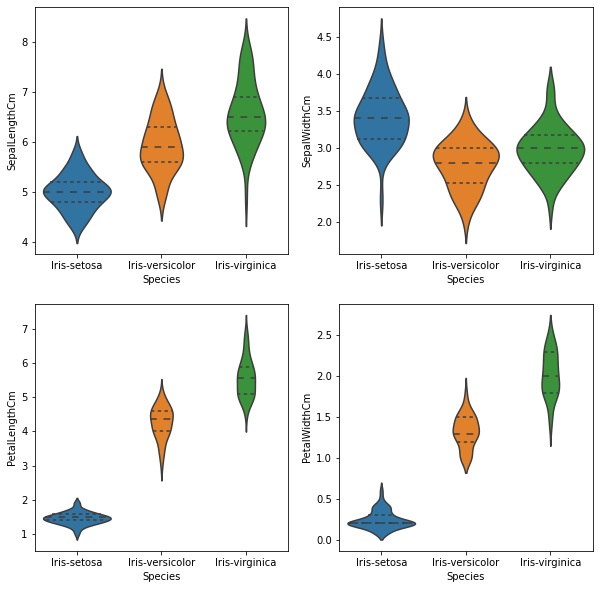

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
sb.violinplot( y = 'SepalLengthCm', x = 'Species', data = data, orient = 'v', ax = axes[0, 0], inner = 'quartile')
sb.violinplot( y ='SepalWidthCm', x = 'Species', data = data, orient = 'v', ax = axes[0, 1], inner = 'quartile')
sb.violinplot( y ='PetalLengthCm', x = 'Species', data = data, orient = 'v' , ax = axes[1, 0], inner = 'quartile')
sb.violinplot( y ='PetalWidthCm', x = 'Species', data = data, orient = 'v' , ax = axes[1, 1], inner = 'quartile')
plt.show()

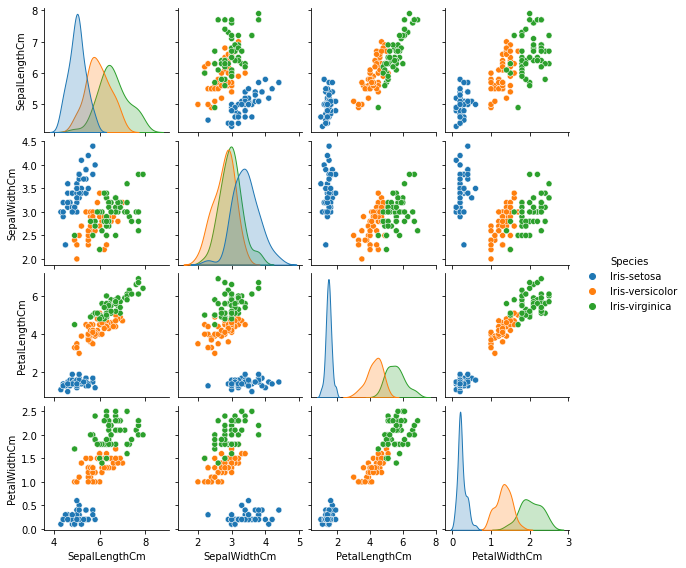

In [63]:
sb.pairplot(data.drop(['Id'], axis = 1), hue='Species', height=2)

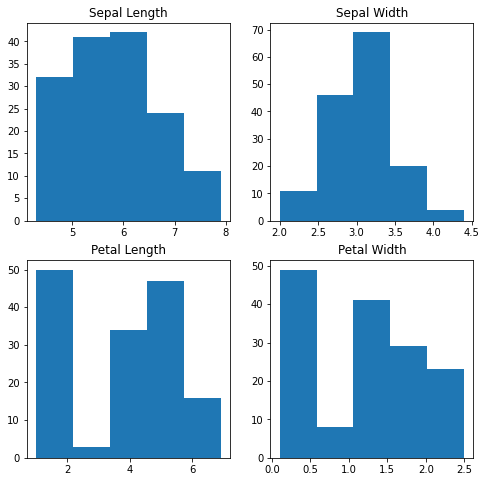

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(8,8))
 
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(data['SepalLengthCm'], bins=5)
 
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(data['SepalWidthCm'], bins=5);
 
axes[1,0].set_title("Petal Length")
axes[1,0].hist(data['PetalLengthCm'], bins=5);
 
axes[1,1].set_title("Petal Width")
axes[1,1].hist(data['PetalWidthCm'], bins=5);

<Axes: xlabel='SepalLengthCm'>

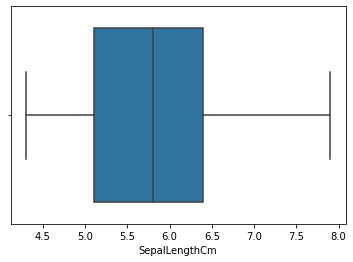

In [65]:
sb.boxplot(x = data['SepalLengthCm'])

<Axes: xlabel='SepalWidthCm'>

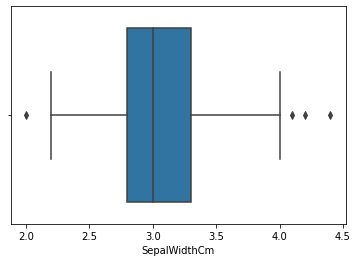

In [66]:
sb.boxplot(x = data['SepalWidthCm'])

In [67]:
import numpy as np
data = data.drop(np.where(data['SepalWidthCm'] > 4.0)[0])
data = data.drop(np.where(data['SepalWidthCm'] < 2.0)[0])

<Axes: xlabel='SepalWidthCm'>

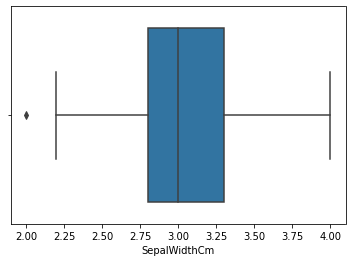

In [68]:
sb.boxplot(x = data['SepalWidthCm'])

<Axes: xlabel='PetalWidthCm'>

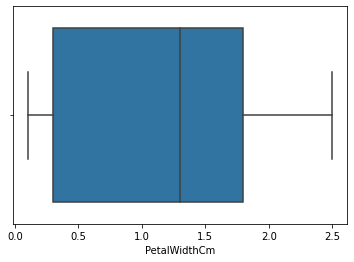

In [69]:
sb.boxplot(x = data['PetalWidthCm'])

<Axes: xlabel='PetalLengthCm'>

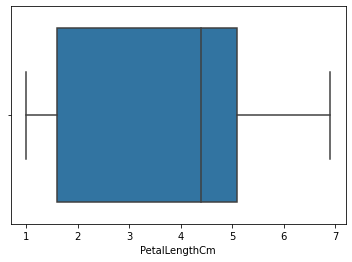

In [70]:
sb.boxplot(x = data['PetalLengthCm'])

# **Splitting the dataset into train and test data**

In [71]:
x = data.drop(['Species', 'Id'], axis=1)

In [72]:
y = data['Species']

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [74]:
from sklearn.metrics import accuracy_score

# **Compare different algorithms to get their accuracy**

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)
model_rfc = rfc.fit(x_train,y_train)
y_rfc=rfc.predict(x_test)
score_rfc = accuracy_score(y_test,y_rfc)
print("Random Forest:", score_rfc)

Random Forest: 1.0


In [76]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0, fit_intercept=False)
model_logr = logr.fit(x_train,y_train)
y_logr = logr.predict(x_test)
score_logr = accuracy_score(y_test,y_logr)
print("Logistic Regression:", score_logr)

Logistic Regression: 1.0


In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=10)
model_gbc = gbc.fit(x_train,y_train)
y_gbc = gbc.predict(x_test)
score_gbc =accuracy_score(y_test,y_gbc)
print("Gradient Boosting:", score_gbc)

Gradient Boosting: 0.9777777777777777


In [78]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
model_dtc = dtc.fit(x_train,y_train)
y_dtc = dtc.predict(x_test)
score_dtc = accuracy_score(y_test,y_dtc)
print("Decision Tree:", score_dtc)

Decision Tree: 0.9333333333333333


In [79]:
from sklearn import svm
svm = svm.SVC()
model_svm = svm.fit(x_train,y_train)
y_svm = svm.predict(x_test)
score_svm = accuracy_score(y_test,y_svm)
print("Support Vector Machine:", score_svm)

Support Vector Machine: 0.9555555555555556


In [80]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=0)
model_nn = nn.fit(x_train,y_train)
y_nn = nn.predict(x_test)
score_nn = accuracy_score(y_test,y_nn)
print("Artificial Neural Network:", score_nn)

Artificial Neural Network: 0.28888888888888886


In [81]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
model_nb = nb.fit(x_train,y_train)
y_nb = nb.predict(x_test)
score_nb = accuracy_score(y_test,y_nb)
print("Support Vector Machine:", score_nb)

Support Vector Machine: 0.8888888888888888


In [82]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Random Forest Classifier', 'Logistic Regression', 'Gradient Boosting Classifier', 'Decision Tree Classifier', 'Support Vector Machine', 'Artificial Neural Networks', 'Naive Bayes'],
    'Accuracy Score': [score_rfc, score_logr, score_gbc, score_dtc, score_svm, score_nn, score_nb]
})

result_data = results.sort_values(by='Accuracy Score', ascending=False)
result_data.head(9)


,Model,Accuracy Score
0,Random Forest Classifier,1.000000
1,Logistic Regression,1.000000
2,Gradient Boosting Classifier,0.977778
4,Support Vector Machine,0.955556
3,Decision Tree Classifier,0.933333
6,Naive Bayes,0.888889
5,Artificial Neural Networks,0.288889


In [83]:
import numpy as np

In [84]:
sepal_length = float(input("Enter Value For Sepal Length: "))
sepal_width = float(input("Enter Value For Sepal Width: "))
petal_length = float(input("Enter Value For Petal Length: "))
petal_width = float(input("Enter Value For Petal Width: "))
x_new = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
prediction = model_gbc.predict(x_new)
print("Prediction: {}".format(prediction))


Enter Value For Sepal Length: 7
Enter Value For Sepal Width: 6
Enter Value For Petal Length: 5
Enter Value For Petal Width: 7
Prediction: ['Iris-virginica']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
